In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score ,roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
df.isna().sum()#checking for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Treating null values in dataset will lead to wrong prediction about applier.
so, we will drop null entries.

In [26]:
df.dropna(inplace=True)
df.reset_index()
df.drop(columns=['Loan_ID'],axis=1,inplace=True)#loan_id is a unique id and have no impact on target column.

In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
df.describe()
#appllicant income, coapplicatincome, loan amount seem to have outloiers but these outliers are genuine ,
#so we will not treat them.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [30]:
df.drop_duplicates()#no duplicate entry found.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
#let's encode object datatype into numeric one.
#coverting string data into numeric form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [48]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


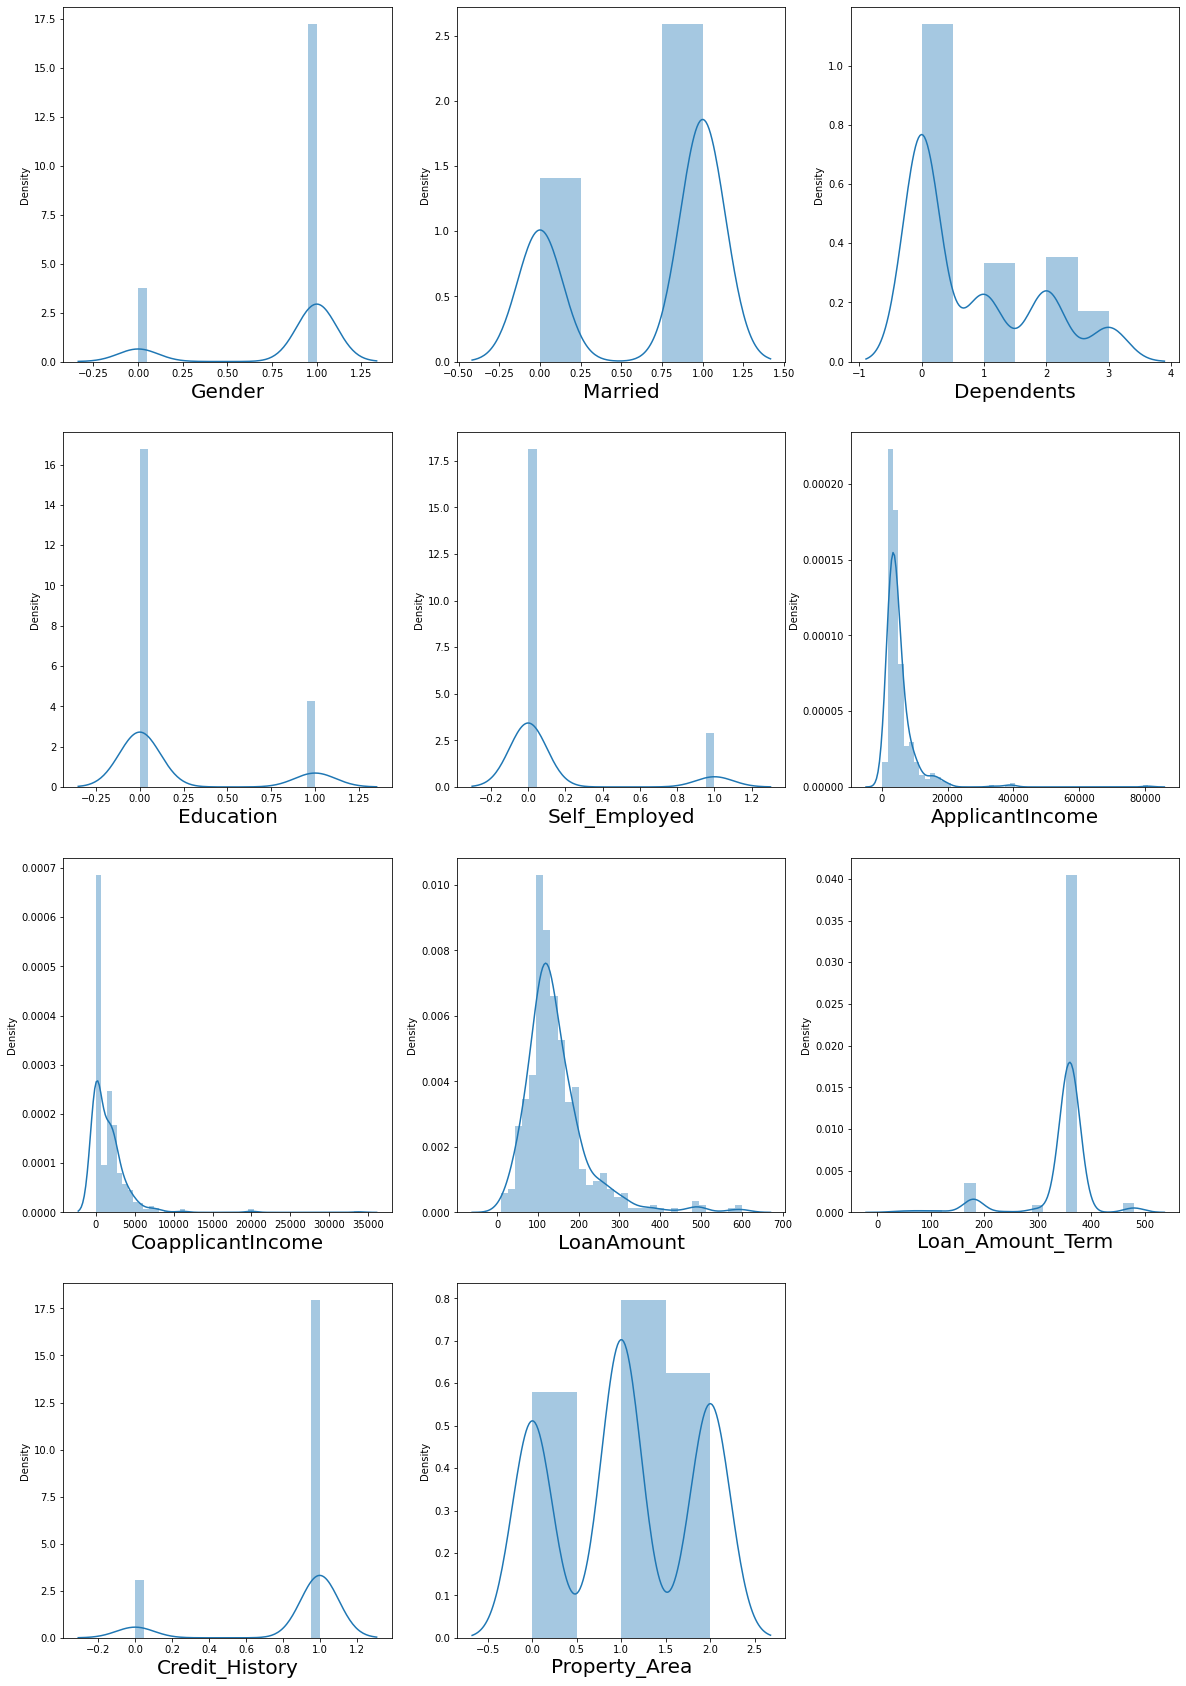

In [35]:
#let's visualize it
plt.figure(figsize=(20,30),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

### Applicantincome,coapplicantincome,loanamount have right skewness.
#### all other features are  categorical.

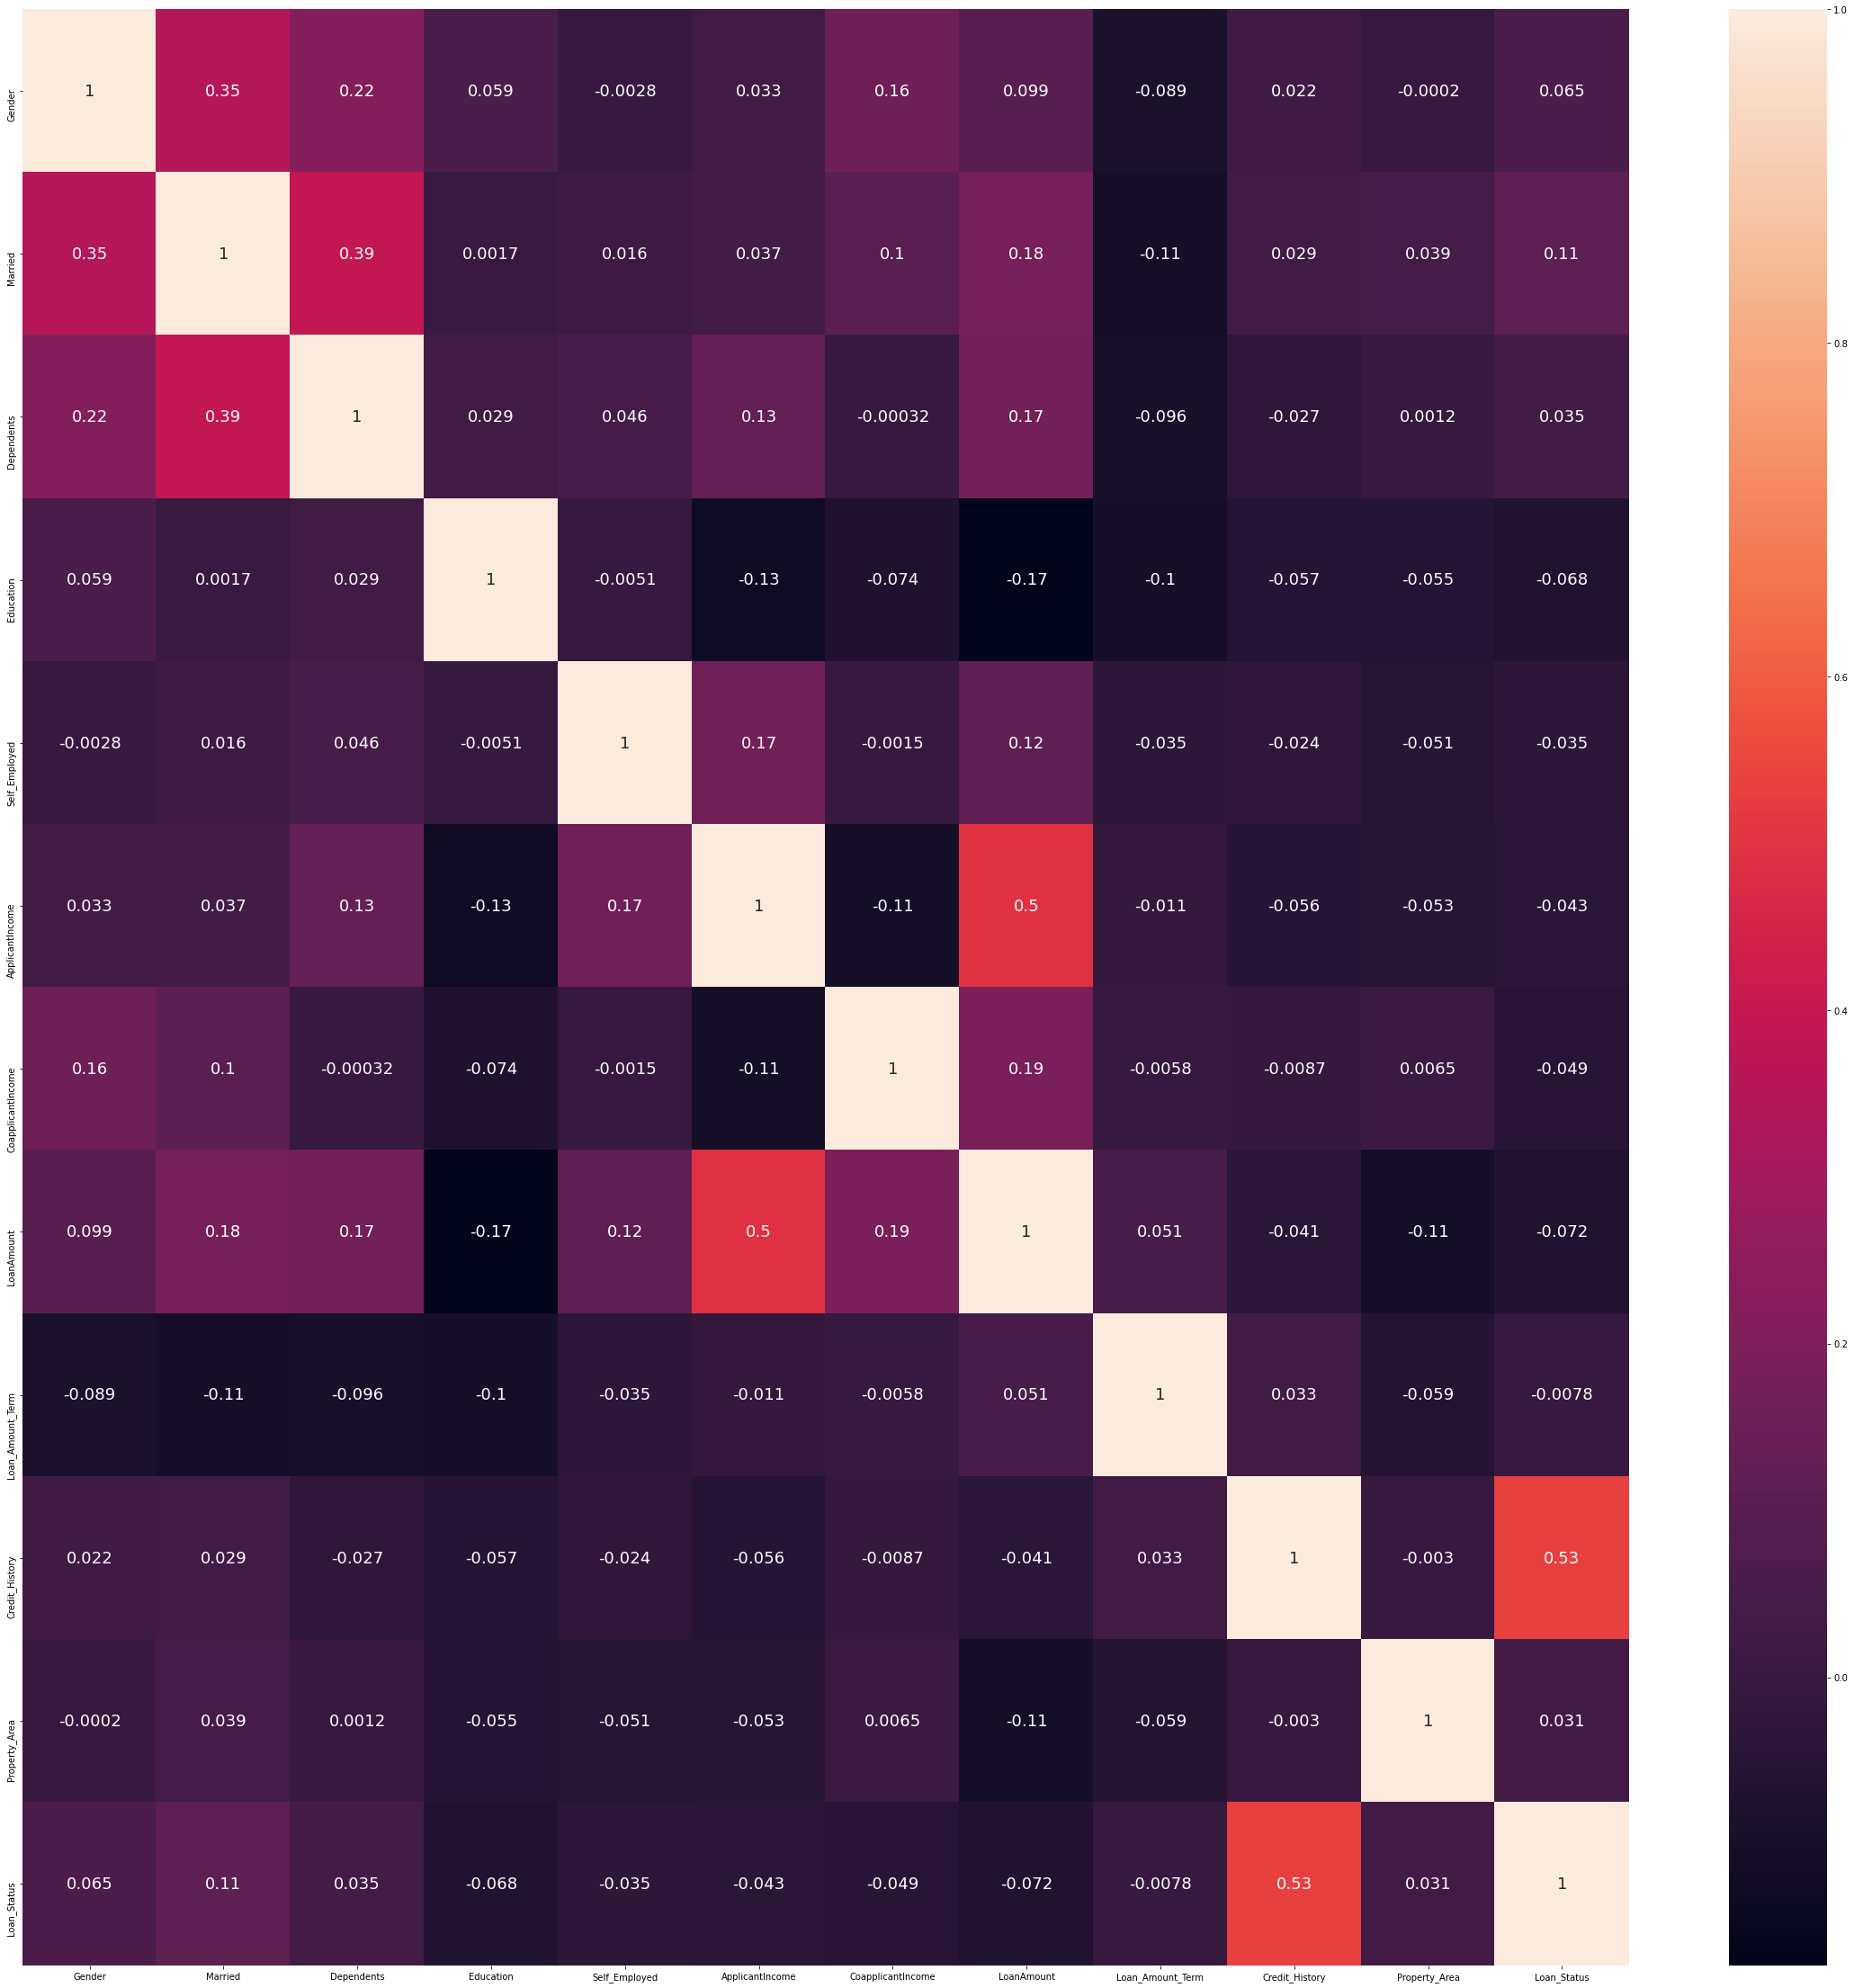

In [42]:
#checking for multicollinearity
corr=df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(data=corr,annot=True,annot_kws={'size':18})
plt.show()

There is no multicollineaarity among the features.

Credit history has highest impact over target column.

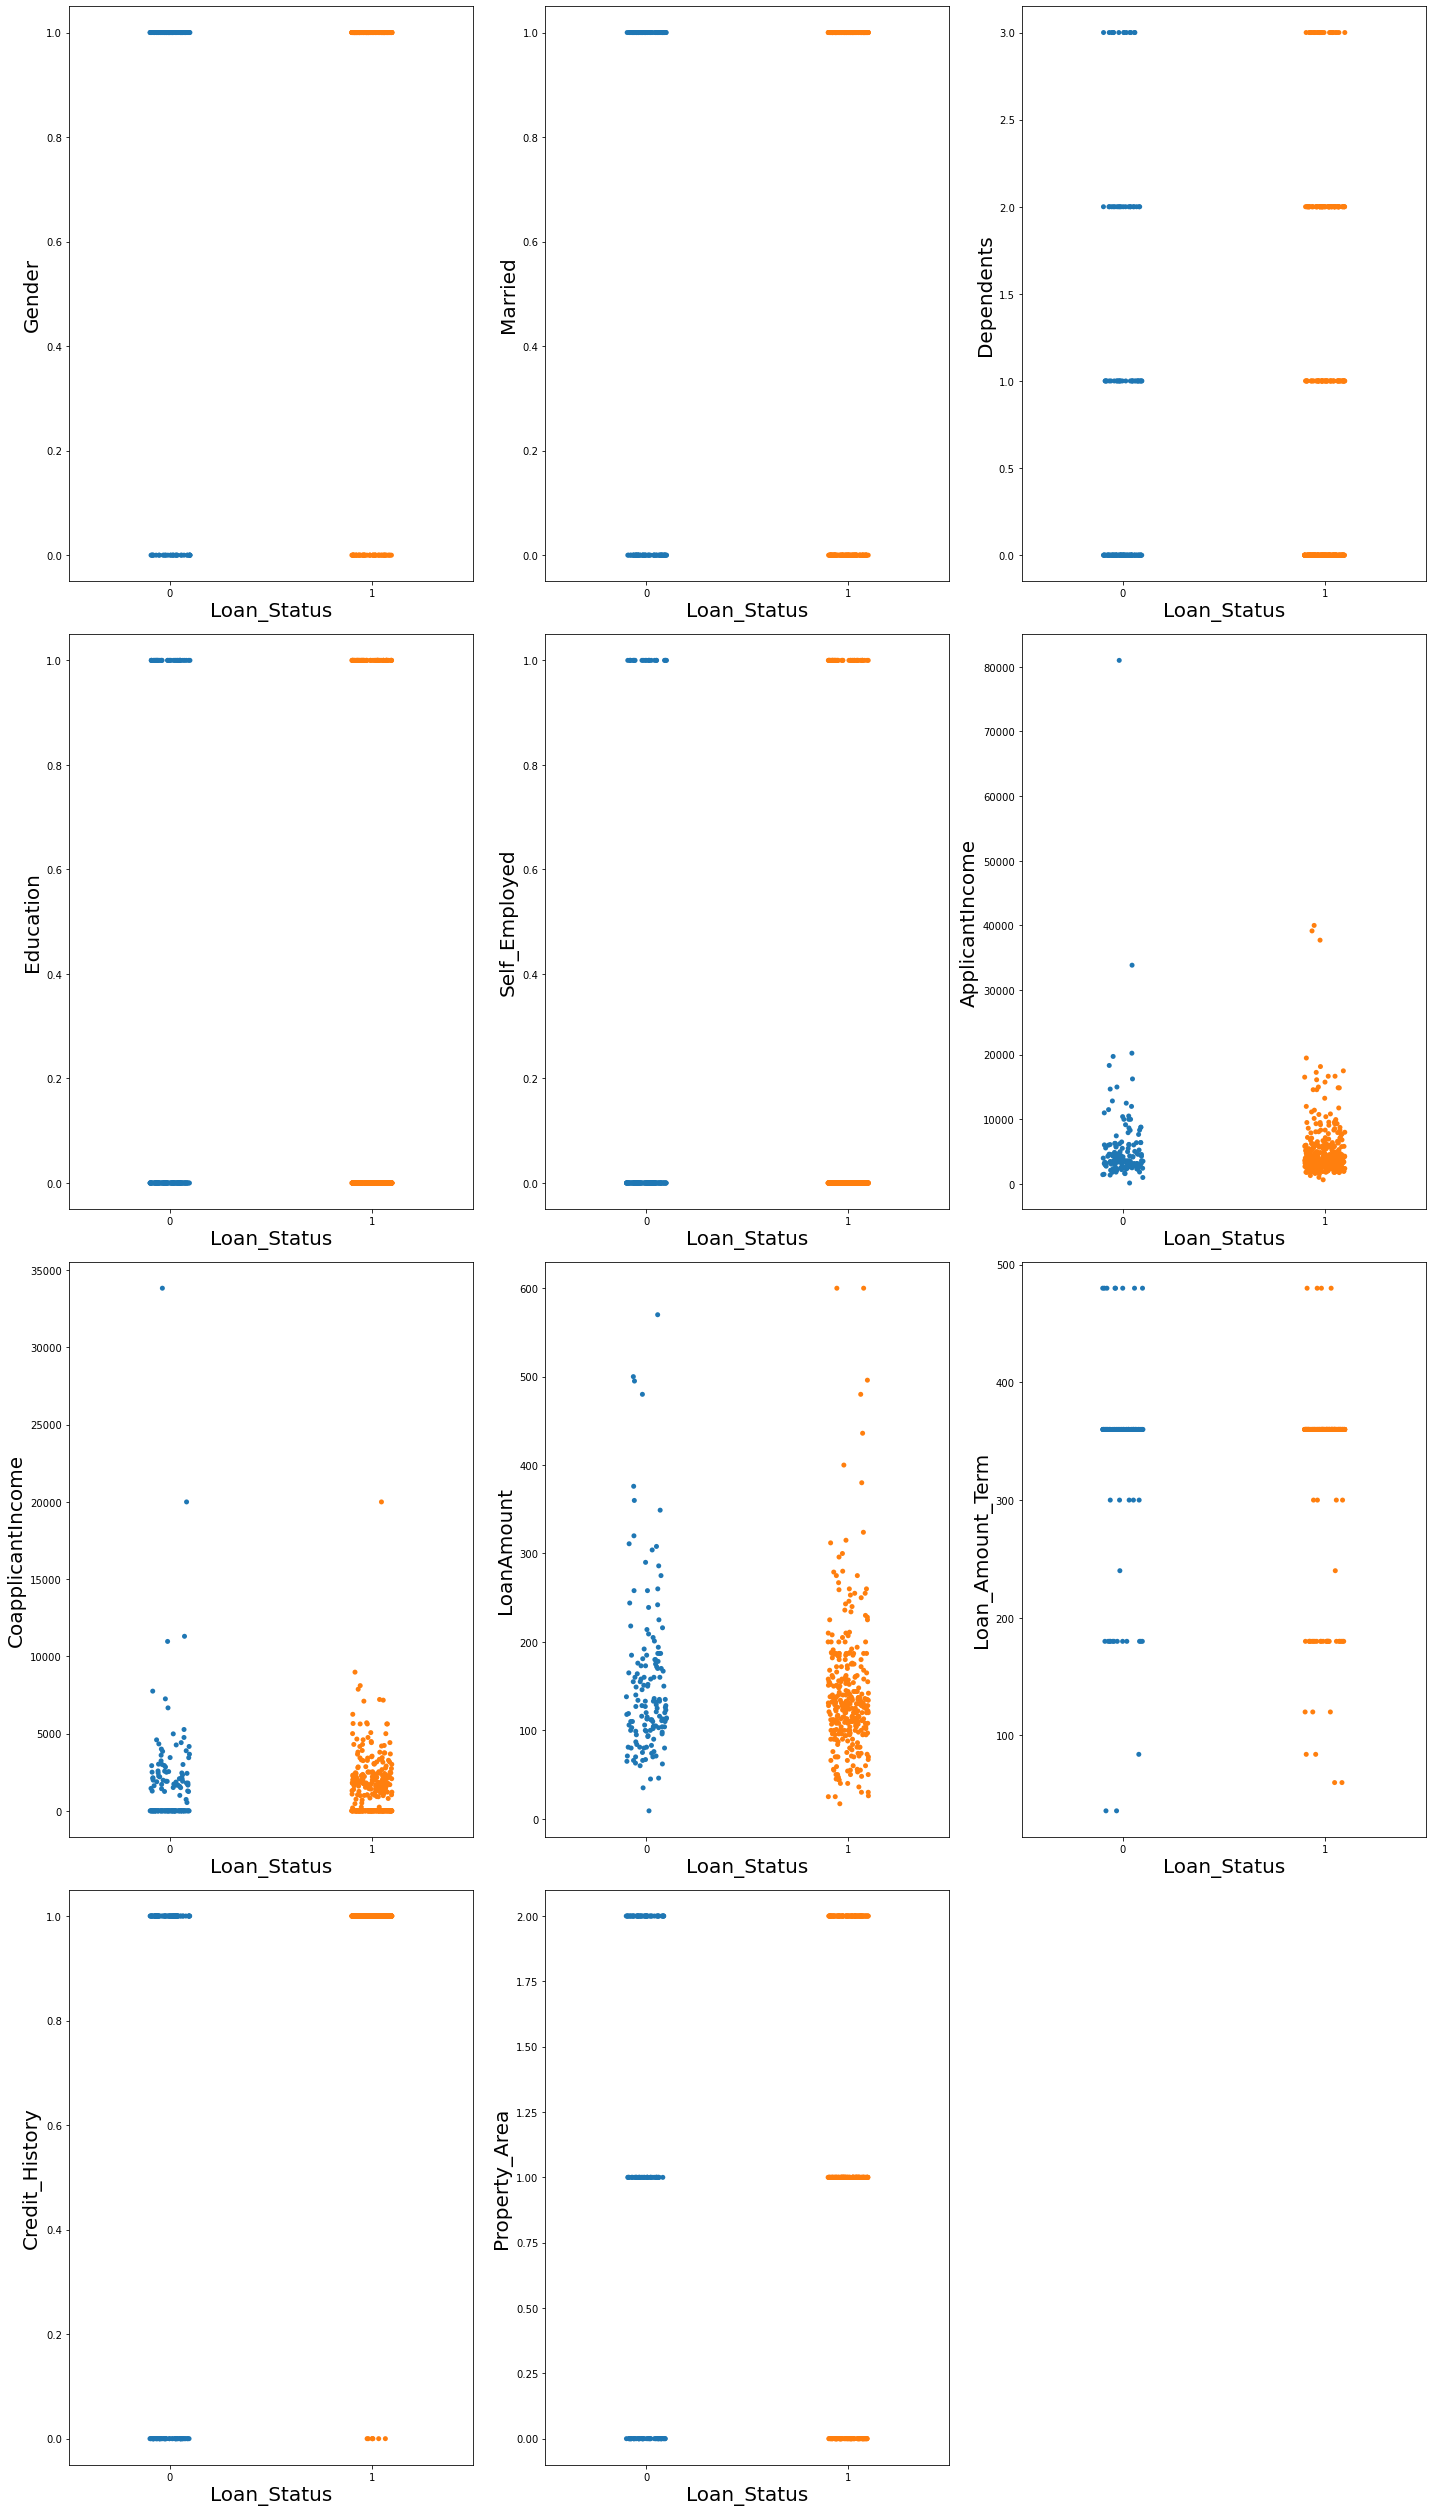

In [44]:
#visualizing data relation between feature and label
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [45]:
#checking for skewness
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status
X.skew()#threshold=+_.75
#let's remove skewness using yeo-johnson method

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform
X_skew=power_transform(X,method='yeo-johnson')

In [47]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)

### Check target column is imbalanced or not.

In [49]:
df.Loan_Status.value_counts()#checking target column is balanced or not
#1=yes,0=no
#dataset is balaced and it's small dataset let's keep it as it is.

1    332
0    148
Name: Loan_Status, dtype: int64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

### Logistic_Regression

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=log_reg.predict(X_train)
print('Training score:',log_reg.score(X_train,y_train))
print('Testing score:',log_reg.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(log_reg,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.7986111111111112
[[20 26]
 [ 3 95]] 

              precision    recall  f1-score   support

           0       0.87      0.43      0.58        46
           1       0.79      0.97      0.87        98

    accuracy                           0.80       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.81      0.80      0.78       144

Training score: 0.8095238095238095
Testing score: 0.7986111111111112
Cross_validation_score: 0.8020833333333334


### Random_forest_classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.7847222222222222
[[21 25]
 [ 6 92]] 

              precision    recall  f1-score   support

           0       0.78      0.46      0.58        46
           1       0.79      0.94      0.86        98

    accuracy                           0.78       144
   macro avg       0.78      0.70      0.72       144
weighted avg       0.78      0.78      0.77       144

Training score: 1.0
Testing score: 0.7847222222222222
Cross_validation_score: 0.80625


### SVC_Classifier

In [60]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
train_pred=svc.predict(X_train)
print("svc_training_score:",svc.score(X_train,y_train))
print("svc_testing_score:",svc.score(X_test,y_test))
pred_svc = svc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

svc_training_score: 0.8303571428571429
svc_testing_score: 0.8055555555555556
accuracy_score : 0.8055555555555556
[[21 25]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.88      0.46      0.60        46
           1       0.79      0.97      0.87        98

    accuracy                           0.81       144
   macro avg       0.83      0.71      0.74       144
weighted avg       0.82      0.81      0.78       144

Cross_validation_score: 0.8125


### Ada Boost Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.7777777777777778
[[24 22]
 [10 88]] 

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        46
           1       0.80      0.90      0.85        98

    accuracy                           0.78       144
   macro avg       0.75      0.71      0.72       144
weighted avg       0.77      0.78      0.77       144

Training score: 0.8511904761904762
Testing score: 0.7777777777777778
Cross_validation_score: 0.8020833333333333


### ADA boost using base estimator as logistic_regression.

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada1=AdaBoostClassifier(base_estimator=log_reg,learning_rate=1)
ada1.fit(X_train,y_train)
y_pred=ada1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada1.predict(X_train)
print('Training score:',ada1.score(X_train,y_train))
print('Testing score:',ada1.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada1,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.7986111111111112
[[20 26]
 [ 3 95]] 

              precision    recall  f1-score   support

           0       0.87      0.43      0.58        46
           1       0.79      0.97      0.87        98

    accuracy                           0.80       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.81      0.80      0.78       144

Training score: 0.8095238095238095
Testing score: 0.7986111111111112
Cross_validation_score: 0.8020833333333334


### XGBoost Classifier

In [68]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=xgb.predict(X_train)
print('Training score:',xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

[10:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7361111111111112
[[20 26]
 [12 86]] 

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        46
           1       0.77      0.88      0.82        98

    accuracy                           0.74       144
   macro avg       0.70      0.66      0.67       144
weighted avg       0.72      0.74      0.72       144

Training score: 1.0
Testing score: 0.7361111111111112
[10:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if

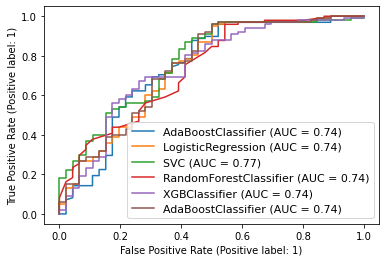

In [69]:
#Let's find best model using Reciever's operating curve by calculating area_under_the_curve
disp=plot_roc_curve(ada,X_test,y_test)
plot_roc_curve(log_reg,X_test,y_test,ax=disp.ax_) #ax_=Axes with confusion matrix of adaboost
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ada1,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### SVC comes out as best model, let's do hyperparameter tuning.

In [70]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [71]:
params = {'kernel' :['poly', 'rbf', 'sigmoid'],
'C':[50, 10, 1.0, 0.1, 0.01],
'gamma':['scale']
    }

from sklearn.model_selection import GridSearchCV


gs2 = GridSearchCV(estimator=svc, param_grid=params, n_jobs=-1, cv=5, scoring='roc_auc')
gs2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='roc_auc')

In [80]:
gs2.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': -1,
 'param_grid': {'kernel': ['poly', 'rbf', 'sigmoid'],
  'C': [50, 10, 1.0, 0.1, 0.01],
  'gamma': ['scale']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'roc_auc',
 'verbose': 0}

In [76]:
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [77]:
y_pred=sv.predict(X_test)

In [78]:
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))

0.8055555555555556
[[21 25]
 [ 3 95]] 

              precision    recall  f1-score   support

           0       0.88      0.46      0.60        46
           1       0.79      0.97      0.87        98

    accuracy                           0.81       144
   macro avg       0.83      0.71      0.74       144
weighted avg       0.82      0.81      0.78       144



In [ ]:
#svc is giving best accuracy of 80 percent

#saving the model in local system
import pickle
filename='finalized_loan_status.pickle'
pickle.dump(ada,open(filename,'wb'))